## 老师给出来的处理的标准
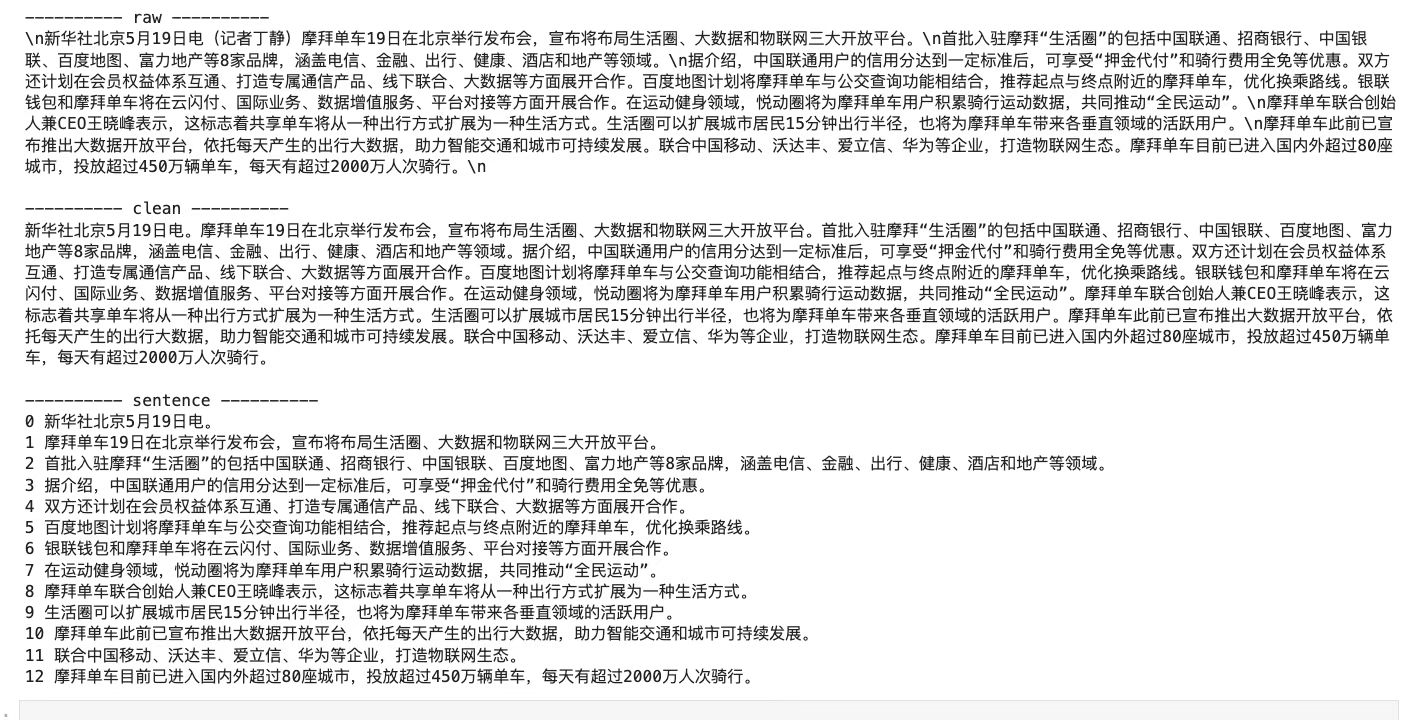

In [1]:
import pandas as pd
import numpy as np
import cchardet
import re

In [2]:
df = pd.read_csv("chinese_news.csv",encoding="gb18030")

In [3]:
df.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


# 存在空值，所以先进行过滤
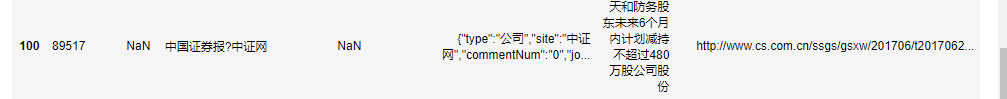

In [4]:
# 查看content是否有空值
pd.isnull(df["content"]).any()

True

In [5]:
# 查看title是否有空值
pd.isnull(df["title"]).any()

True

In [6]:
# 一共89611条数据 可以查看到content 一共87054条数据，title一共89577条数据
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       89611 non-null  int64 
 1   author   79396 non-null  object
 2   source   89609 non-null  object
 3   content  87054 non-null  object
 4   feature  89611 non-null  object
 5   title    89577 non-null  object
 6   url      87144 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


In [7]:
# 对content、title清除Nan
df = df.dropna(subset = ['content',"title"])

In [8]:
# 在此查看数据，Nan已经被处理掉了
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87054 entries, 0 to 89610
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       87054 non-null  int64 
 1   author   76925 non-null  object
 2   source   87052 non-null  object
 3   content  87054 non-null  object
 4   feature  87054 non-null  object
 5   title    87054 non-null  object
 6   url      87054 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
# 可以看到序号是乱序的，我们对序号进行重置
df.tail(10)

,id,author,source,content,feature,title,url
89601,10,LISELOTTE SABROE,新华社,新华社照片，外代，2017年6月7日\n（外代二线）足球——国际友谊赛：德国平丹麦\n6月6...,"{""type"":""足球"",""site"":""新华社"",""url"":""http://home.x...",[7]（外代二线）足球——国际友谊赛：德国平丹麦,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89602,9,LISELOTTE SABROE,新华社,新华社照片，外代，2017年6月7日\n（外代二线）足球——国际友谊赛：德国平丹麦\n6月6...,"{""type"":""足球"",""site"":""新华社"",""url"":""http://home.x...",[9]（外代二线）足球——国际友谊赛：德国平丹麦,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89603,8,郑焕松,新华社,新华社照片，北京，2017年6月7日\n电影《血战湘江》举行清华大学巡映活动\n6月6日，电...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（文化）（1）电影《血战湘江》举行清华大学巡映活动,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89604,7,郑焕松,新华社,新华社照片，北京，2017年6月7日\n电影《血战湘江》举行清华大学巡映活动\n6月6日，清...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（文化）（2）电影《血战湘江》举行清华大学巡映活动,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89605,6,郑焕松,新华社,新华社照片，北京，2017年6月7日\n电影《血战湘江》举行清华大学巡映活动\n6月6日，电...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（文化）（3）电影《血战湘江》举行清华大学巡映活动,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89606,5,邹峥,新华社,新华社照片，多伦多，2017年6月7日\n（体育）（2）冰球——国家女子冰球队海外选秀在多伦...,"{""type"":""冰球"",""site"":""新华社"",""url"":""http://home.x...",（体育）（2）冰球——国家女子冰球队海外选秀在多伦多展开,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89607,4,王衡,新华社,新华社兰州6月3日电（王衡、徐丹）记者从甘肃省交通运输厅获悉，甘肃近日集中开建高速公路、普通...,"{""type"":""宏观经济"",""site"":""新华社"",""url"":""http://home...",（经济）甘肃集中开工35个重点交通建设项目,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89608,3,张旌,新华社,\n\n2017年5月29日，在法国巴黎郊外的凡尔赛宫，法国总统马克龙出席新闻发布会。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",法国议会选举 马克龙有望获“压倒性胜利”,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89609,2,夏文辉,新华社,\n\n2017年5月25日，在美国马萨诸塞州剑桥市，哈佛大学毕业生在毕业典礼上欢呼。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",哈佛大学为何取消这些新生入选资格？,http://home.xinhua-news.com/gdsdetailxhsnew/22...
89610,1,王子江 张寒,新华社,新华社德国杜塞尔多夫６月６日电题：乒乓女球迷 \n 新华社记者王子江、张寒\n 熊老...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",（体育）题：乒乓女球迷,http://home.xinhua-news.com/gdsdetailxhsnew/22...


In [9]:
df = df.reset_index(drop=True)

In [10]:
# 现在看到索引恢复正常
df.tail(10)

,id,author,source,content,feature,title,url
87044,10,LISELOTTE SABROE,新华社,新华社照片，外代，2017年6月7日\n（外代二线）足球——国际友谊赛：德国平丹麦\n6月6...,"{""type"":""足球"",""site"":""新华社"",""url"":""http://home.x...",[7]（外代二线）足球——国际友谊赛：德国平丹麦,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87045,9,LISELOTTE SABROE,新华社,新华社照片，外代，2017年6月7日\n（外代二线）足球——国际友谊赛：德国平丹麦\n6月6...,"{""type"":""足球"",""site"":""新华社"",""url"":""http://home.x...",[9]（外代二线）足球——国际友谊赛：德国平丹麦,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87046,8,郑焕松,新华社,新华社照片，北京，2017年6月7日\n电影《血战湘江》举行清华大学巡映活动\n6月6日，电...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（文化）（1）电影《血战湘江》举行清华大学巡映活动,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87047,7,郑焕松,新华社,新华社照片，北京，2017年6月7日\n电影《血战湘江》举行清华大学巡映活动\n6月6日，清...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（文化）（2）电影《血战湘江》举行清华大学巡映活动,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87048,6,郑焕松,新华社,新华社照片，北京，2017年6月7日\n电影《血战湘江》举行清华大学巡映活动\n6月6日，电...,"{""type"":""社会"",""site"":""新华社"",""url"":""http://home.x...",（文化）（3）电影《血战湘江》举行清华大学巡映活动,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87049,5,邹峥,新华社,新华社照片，多伦多，2017年6月7日\n（体育）（2）冰球——国家女子冰球队海外选秀在多伦...,"{""type"":""冰球"",""site"":""新华社"",""url"":""http://home.x...",（体育）（2）冰球——国家女子冰球队海外选秀在多伦多展开,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87050,4,王衡,新华社,新华社兰州6月3日电（王衡、徐丹）记者从甘肃省交通运输厅获悉，甘肃近日集中开建高速公路、普通...,"{""type"":""宏观经济"",""site"":""新华社"",""url"":""http://home...",（经济）甘肃集中开工35个重点交通建设项目,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87051,3,张旌,新华社,\n\n2017年5月29日，在法国巴黎郊外的凡尔赛宫，法国总统马克龙出席新闻发布会。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",法国议会选举 马克龙有望获“压倒性胜利”,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87052,2,夏文辉,新华社,\n\n2017年5月25日，在美国马萨诸塞州剑桥市，哈佛大学毕业生在毕业典礼上欢呼。（新华...,"{""type"":""其它"",""site"":""新华社"",""url"":""http://home.x...",哈佛大学为何取消这些新生入选资格？,http://home.xinhua-news.com/gdsdetailxhsnew/22...
87053,1,王子江 张寒,新华社,新华社德国杜塞尔多夫６月６日电题：乒乓女球迷 \n 新华社记者王子江、张寒\n 熊老...,"{""type"":""体育"",""site"":""新华社"",""url"":""http://home.x...",（体育）题：乒乓女球迷,http://home.xinhua-news.com/gdsdetailxhsnew/22...


In [16]:
# 清除括号中内容
def drop_brackets_content(sentence):
    pattern  = "（[\s\S]*?）"
    res = re.sub(pattern,"",sentence)
    return res

In [12]:
# 去掉空格和换行符
def clean_sentence(sentence):
    clean_sentence = sentence.replace("\r\n","").replace("　　","")
    return clean_sentence

In [21]:
# 对句子完成切割--分句
def cut_sents(content):
    sentences = re.split(r"([。!！?？；;])", content)[:-1]
    sentences.append("")
    sentences = ["".join(i) for i in zip(sentences[0::2],sentences[1::2])]
    return sentences

In [24]:
def segmentation_sentence(sentence):
    return cut_sents(clean_sentence(drop_brackets_content(sentence)))

In [33]:
# 展示分句后的效果
import random
i = random.randint(0,100)
sentence = df["content"][i]
print("--------------- 原始句子 ---------------" )
print(sentence)
print()
print("--------------- clean后句子 ---------------")
print(clean_sentence(drop_brackets_content(sentence)))
print()
print("--------------- 分句后的句子 ---------------")
new_sentence = segmentation_sentence(sentence)
for index,_sentence in enumerate(new_sentence):
    print("{} {}".format(index,_sentence))

--------------- 原始句子 ---------------
6月21日，MSCI在官网发布公告称，从明年6月起将中国A股纳入MSCI新兴市场指数和MSCI ACWI全球指数，这恐怕是近半年来中国资本市场上最令人振奋的消息。
A股早在2013年6月就已纳入新兴市场指数的候选列表中，但此后几年，都因为配额分配、资本流动限制、资本利得税等所谓原因而遭否决，尤其是在2016年第三次闯关失败后，中国投资者和相关监管部门似乎对“A股入摩”已心灰意冷，甚至连证监会分管国际合作的副主席方星海都在今年一月份的时候表示，“中国与MSCI在股指期货上的观点存在分歧，中国并不急于加入MSCI全球指数”。
然而事情最终出现了转机，今年3月，MSCI提出纳入A股的新方案——将A股的权重由原计划的1%降低至0.5%，并将指数纳入A股的数量由原来计划的448只减至169只，这一举动其实已经预示了A股今年大概率“入摩”。从6月21日宣布的结果来看，相比3月份的调整可以说还有惊喜，最终确定的权重为0.73%，股票数量为222只。
就具体的时间表而言，MSCI新兴市场A股纳入计划分两步走，第一步是在2018年5月按2.5%的指数纳入因子（index inclusion factor）给予A股0.37%的权重，第二步是在2018年8月按5%的因子将权重提高至计划的0.73%。从现在到A股正式进入MSCI新兴市场指数尚有一年时间，因此短期来看，这一事件不会马上起到提振国内股市的作用。另一方面，大部分机构预计本次“入摩”将为中国带来约1000亿美元的资金流入。相比于标的公司近2万亿美元的市值来说，这些资金并不能在市场上掀起太大的涟漪，只有当纳入因子进一步提高时（根据MSCI在2016年提出的A股纳入计划，纳入因子达到100%时，A股的权重将达到18.1%），“入摩”才可能在资金面上直接对A股市场有重大利好。
除了股价上的利好，“入摩”更重大的意义在于其给国内资本市场改革带来机遇与动力。MSCI在做出纳入决定前，需要广泛咨询国际机构投资者，这些投资者能够在全球范围内进行资产配置，他们最擅于比较各个国家的投资环境、资本市场对外资的友好程度。此前A股屡次碰壁就是因为国内金融市场上的QFII配额限制、QFII每月资本赎回限制、大面积股票停牌以及交易所需对A股相关金融产品预审等过多的管制与不确定性，给海外

In [161]:
# 对title进行清洗
i = random.randint(0,1000)
sentence = df["title"][i]
print("--------------- 原始title ---------------" )
print(sentence)
print()
print("--------------- clean后title ---------------")
print(clean_sentence(drop_brackets_content(sentence)))

--------------- 原始title ---------------
英格兰最贵门将出炉!历史第3身价 签约埃弗顿5年

--------------- clean后title ---------------
英格兰最贵门将出炉!历史第3身价 签约埃弗顿5年


In [41]:
# 通过textrank获取关键词
from textrank4zh import TextRank4Keyword, TextRank4Sentence
i = random.randint(0,100)
sentence = df["content"][i]
tr4w = TextRank4Keyword()
tr4w.analyze(text=sentence, lower=True, window=2)
print( '关键词：' )
for item in tr4w.get_keywords(50, word_min_len=1):
    print(item.word, item.weight)

关键词：
工会 0.049570012636261776
服务 0.045383056452824026
分行 0.030980714045081507
四川省 0.030768848623687665
省 0.03071462144947212
合作 0.028822391088749927
成都 0.02853818309056671
仪式 0.026883895721087913
会员 0.026877842738432342
图片 0.025863483596715038
邮储 0.020984303211643785
党组 0.02086724760960642
公司 0.01982065164925787
银行 0.019055046759496933
总工会 0.019021877649446624
邮政 0.01872533216476196
邹 0.018081450114780195
日电 0.017714791851195753
记者 0.017714791851195753
签约 0.017431679202743536
具体内容 0.0172846035202621
成员 0.01695223126441304
协议 0.016839353876714813
具有 0.01663773481237861
管理 0.016406340468137465
会籍 0.01636215074335536
普惠 0.015989715214062807
框架 0.01593884343282214
任远明 0.015885081364730005
实名制 0.015839649441834615
副行长 0.015608380387245643
生活 0.01502950268858392
性 0.01496330196115496
实施 0.014656104449226274
金融 0.01455524868379795
社会 0.01455524868379795
身份 0.014323633707406079
工作 0.014292591323764361
签订 0.014048578944307945
识别 0.014011668104426335
点击 0.013640445978436104
进入 0.01364044597843610

In [42]:
def save_key_word(sentence):
    from textrank4zh import TextRank4Keyword, TextRank4Sentence
    tr4w = TextRank4Keyword()
    tr4w.analyze(text=sentence, lower=True, window=2)
    save_key_word_list = []
    for item in tr4w.get_keywords(50, word_min_len=1):
        save_key_word_list.append((item.word, item.weight))
    return save_key_word_list

In [45]:
new_df = df[:200]

In [46]:
new_df.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [47]:
new_df["key_word"] = new_df["content"].apply(save_key_word)

C:\Users\waws\AppData\Local\Temp\ipykernel_21404\368373246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["key_word"] = new_df["content"].apply(save_key_word)


In [52]:
def cut_word_test(context_list):
    import jieba
    stopkey=[line.strip() for line in open('stopwords.txt',encoding='utf-8').readlines()]
    total_cutword = []
    for i in context_list:
        words=jieba.cut(i)
        words_filter=[word for word in words if word not in stopkey]
        if len(words_filter) !=0:
            total_cutword.append(words_filter)
    return total_cutword

In [57]:
total_cutword = cut_word_test([clean_sentence(drop_brackets_content(i)) for i in list(new_df["content"])])

In [58]:
total_cutword

[['本周',
  '小米',
  '手机',
  '6',
  '15',
  '款',
  '机型',
  '外',
  '机型',
  '已',
  '暂停',
  '更新',
  '发布',
  '确保',
  '工程师',
  '精力',
  '系统优化',
  '工作',
  '有人',
  '猜测',
  '精力',
  '用到',
  'MIUI',
  ' ',
  '9',
  '研发',
  '之中',
  'MIUI',
  ' ',
  '8',
  '去年',
  '5',
  '月',
  '发布',
  '距今已有',
  '一年',
  '有余',
  '更新换代',
  'MIUI',
  ' ',
  '9',
  '确切',
  '信息',
  '等待',
  '官方消息'],
 ['骁龙',
  '835',
  '唯一',
  'Windows',
  ' ',
  '10',
  '桌面',
  '平台',
  '认证',
  'ARM',
  '处理器',
  '高通',
  '只',
  '性能',
  '去',
  '屏蔽掉',
  '小',
  '核心',
  '正',
  '联手',
  '微软',
  '找到',
  '一种',
  '适合',
  '桌面',
  '平台',
  '兼顾',
  '性能',
  '功耗',
  '完美',
  '方案',
  '报道',
  '称',
  '微软',
  '拿到',
  '新',
  '源码',
  'Windows',
  ' ',
  '10',
  '更好',
  'big',
  '架构',
  '资料',
  '骁龙',
  '835',
  '集成',
  'CPU',
  'GPU',
  '基带',
  '蓝牙',
  'Wi',
  'Fi',
  'SoC',
  '传统',
  'Wintel',
  '方案',
  '节省',
  '至少',
  '30%',
  'PCB',
  '空间',
  '按计划',
  'Q4',
  '华硕',
  '惠普',
  '联想',
  '首发',
  '骁龙',
  '835',
  ' ',
  'Win10',
  '电脑',
  '预计',
  '均',
  '二合一',
  '形态',

In [70]:
from gensim.models import Word2Vec
model = Word2Vec(total_cutword, size=256, window=5,iter=1000, min_count=1, workers=4)

In [98]:
from sklearn.metrics.pairwise import cosine_similarity
new_key_word = []
new_word_list = []
i = random.randint(0,100)
for key,value in new_df["key_word"][i]:
    new_key_word.append((key,value))
    new_word_list.append(key)
    if key in model.wv.index2word:
        _index = model.wv.index2word.index(key)
        for index,word in enumerate(model.wv.index2word):
            if index == _index:
                continue
            else:
                cosine_value = cosine_similarity([model.wv.vectors[index],model.wv.vectors[_index]])
                if cosine_value[0][1] > 0.8:
                    print("{}和{}是相似的，相似度是：{}".format(word,key,cosine_value[0][1]))
                    if word not in new_word_list:
                        new_key_word.append((word,value))
                        new_word_list.append(word)
                    
print(new_key_word)

戴尔公司和并入是相似的，相似度是：0.9761840105056763
并入和戴尔公司是相似的，相似度是：0.9761840105056763
特殊性和戴尔公司是相似的，相似度是：0.8145504593849182
存储系统和提供商是相似的，相似度是：0.9891172051429749
['emc', '业务', '转型', '客户', '新', '中国', '全球', '基础架构', '数字化', '合作伙伴', '领导者', '进行', '图片', '实体', '发展', '谭仲良', '解决方案', '市场', '完成', '认为', '组织', 'strategy', '成为', '后者', '机构', 'group', '实现', '表示', 'esg', '型业务', '收购', '正在', '并入', '戴尔公司', '戴尔公司', '特殊性', '研究', '显示', '观众', '应用', '直播', '媒体', '变革', '策略', '在场', '率领', '相关', '方面', '交付', '提供商', '存储系统', '培育', '趋势']


In [93]:
new_sentence = segmentation_sentence(new_df["content"][0])
sentence_score_list = []
for index,_sentence in enumerate(new_sentence):
    score = 0
    for key,value in new_key_word:
        if key in _sentence:
            score += value
    sentence_score_list.append((_sentence,score))

sentence_score_list.append((new_df["title"][0]+"。",0.5))

sentence_score_list.sort(key=lambda x:-x[1])

In [94]:
sentence_score_list

[('小米MIUI 9首批机型曝光：共计15款。', 0.5),
 ('此外，自本周起，除小米手机6等15款机型外，其余机型已暂停更新发布，以确保工程师可以集中全部精力进行系统优化工作。',
  0.43767894924580786),
 ('当然，关于MIUI 9的确切信息，我们还是等待官方消息。', 0.13660500867688713),
 ('有人猜测这也是将精力主要用到MIUI 9的研发之中。', 0.11049404086497913),
 ('MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。', 0.10461200161158521)]

In [96]:
def opuput_summary(N):
    sentence = ""
    for key,value in sentence_score_list:
        if len(sentence) < N:
            sentence += key
        else:
            break
    return sentence

In [97]:
opuput_summary(50)

'小米MIUI 9首批机型曝光：共计15款。此外，自本周起，除小米手机6等15款机型外，其余机型已暂停更新发布，以确保工程师可以集中全部精力进行系统优化工作。'

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
new_key_word = []
new_word_list = []
i = random.randint(0,100)
print("------------------当前的文章的原文是------------------------")
print(clean_sentence(drop_brackets_content(new_df["content"][i])))
for key,value in new_df["key_word"][i]:
    new_key_word.append((key,value))
    new_word_list.append(key)
    if key in model.wv.index2word:
        _index = model.wv.index2word.index(key)
        for index,word in enumerate(model.wv.index2word):
            if index == _index:
                continue
            else:
                cosine_value = cosine_similarity([model.wv.vectors[index],model.wv.vectors[_index]])
                if cosine_value[0][1] > 0.8:
#                     print("{}和{}是相似的，相似度是：{}".format(word,key,cosine_value[0][1]))
                    if word not in new_word_list:
                        new_key_word.append((word,value))
                        new_word_list.append(word)
                    
new_sentence = segmentation_sentence(new_df["content"][i])
sentence_score_list = []
for index,_sentence in enumerate(new_sentence):
    score = 0
    for key,value in new_key_word:
        if key in _sentence:
            score += value
    sentence_score_list.append((_sentence,score))

sentence_score_list.append((clean_sentence(drop_brackets_content(new_df["title"][i]))+"。",0.5))

sentence_score_list.sort(key=lambda x:-x[1])

def opuput_summary(N):
    sentence = ""
    for key,value in sentence_score_list:
        if len(sentence) < N:
            sentence += key
        else:
            break
    return sentence

print()
print("------------------文章摘要是------------------------")
opuput_summary(100)

------------------当前的文章的原文是------------------------
2017年上海国际电影电视节，包括6月12日至16日举办的第二十三届上海电视节和6月17日至26日举办的第二十届上海国际电影节，是“一带一路”国际合作高峰论坛之后，我国举办的首个国际重大文化活动。正因如此，本届影视节把推进“一带一路”人文交流贯穿于办节始终。用上海国际影视节中心主任傅文霞的话来说，“‘一带一路’主题，将成为本届影视节的最大亮点”。以电影节为例。本届电影节的“一带一路”主题，具体体现在论坛、影展、市场、开闭幕和动作电影周等一系列活动中。去年，为落实国家“一带一路”倡议，上海国际电影节与塔林黑夜、孟买、开罗等国际非专门类竞赛型电影节签订了合作协议。第二十届上海国际电影节进一步加大合作力度，邀请罗马尼亚、匈牙利、希腊、以色列等15个国家的电影节派出代表，在电影节首日共同签订“一带一路”电影文化交流合作机制备忘录，以电影为载体，增进各国之间文化艺术的传播和交流。电影节还举办“一带一路”参与国家电影节和电影机构负责人参加的“一带一路”电影文化圆桌论坛，其中包括伊朗、埃及、阿联酋等参与国家电影节的主席。圆桌论坛的主题为聚焦各国电影产业发展现状，分享关于电影节品牌价值提升、青年电影人挖掘与培育、观众培养等方面的经验与模式，并探讨未来进一步合作的方式，共同谋划在“一带一路”电影文化的互鉴互学中，筹划电影发展的蓝图。本届电影节的市场板块设立“一带一路”国家主题馆，邀约超过25个参与国家和地区的电影人、电影机构参与展示；同时，还举办“一带一路”国家电影机构代表国别文化推广、与中国电影制片人进行一对一交流等活动。主题馆通过各国文化特色和电影产业展示、电影取景地介绍以及电影拍摄优惠政策推介等多种方式，充分挖掘“一带一路”参与国家文化底蕴，带动其电影文化的推广，促进中外人文影视以开放包容、互利共赢的精神互动合作，并积极鼓励我国电影“走出去”。从前年首办“丝绸之路”影展单元，到去年起将“一带一路”确定为常设单元，上海国际电影节的这个机制，引起了众多国家电影人的关注和响应，也促使更多的“一带一路”参与国家和地区电影人，参与第二十届上海国际电影节的申报。据统计，本届电影节共收到来自106个国家的2528部影片，其中，“一带一路”上有47个国家的电影人和电影机构，共申报了1016部

'聚焦上海国际电影节：“一带一路”，照耀光影世界。第二十届上海国际电影节进一步加大合作力度，邀请罗马尼亚、匈牙利、希腊、以色列等15个国家的电影节派出代表，在电影节首日共同签订“一带一路”电影文化交流合作机制备忘录，以电影为载体，增进各国之间文化艺术的传播和交流。'